In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib widget
import matplotlib.gridspec as gridspec

Text(0.5, 1.0, 't/T = 16.0')

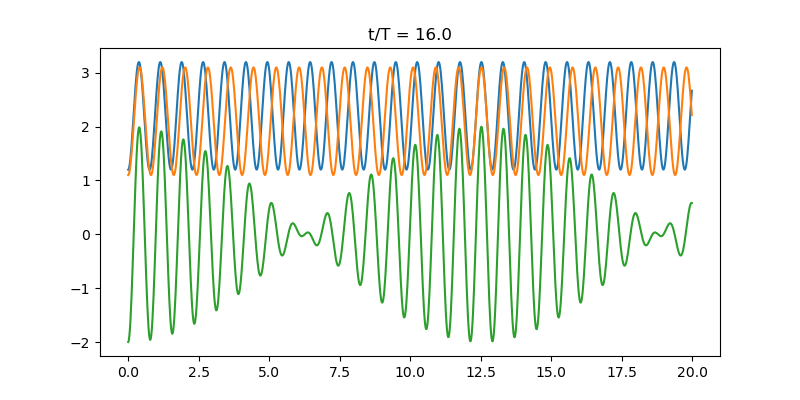

In [20]:

# Shallow

fig, ax = plt.subplots(figsize=(8, 4))
f0 = 4
om = 2*np.pi*f0
df = 2*np.pi * 0.25
omp = om + df /2 
omm = om - df /2 

k = om / np.sqrt(9.8*1)
kp = (om + df/2)/ np.sqrt(9.8*1)
km = (om - df/2)/ np.sqrt(9.8*1)

x = np.arange(0, 20, 0.02)

t = 4
xp = np.cos((kp*x - omp * t))
xm = np.cos((km*x - omm * t))

ax.plot(x, xp+2.2)
ax.plot(x, xm+2.1)
ax.plot(x, xp + xm)
ax.set_title(f't/T = {t*om/2/np.pi}')


In [6]:
fig, ax = plt.subplots()
k = np.arange(0.0001, 0.1, 0.0001)
H = 100
g = 9.8
cp = np.sqrt((g / k) * np.tanh(k*H))
ax.plot(k*H, cp)
ax.set_xlabel('kH')
ax.set_ylabel('$c_p$ [m/s] (H=100 m)')
ax.plot(k*H, np.sqrt(g/k), '--', label='deep water')
ax.plot(k*H, np.sqrt(g*H + 0*k), '--', label='shallow water')
ax.set_ylim(0, 50)
ax.set_xscale('log')
ax.legend()
fig.savefig('GravityWaveDispersion.pdf')

<IPython.core.display.Javascript object>

In [22]:
x = np.arange(0,2000,1.)

<IPython.core.display.Javascript object>


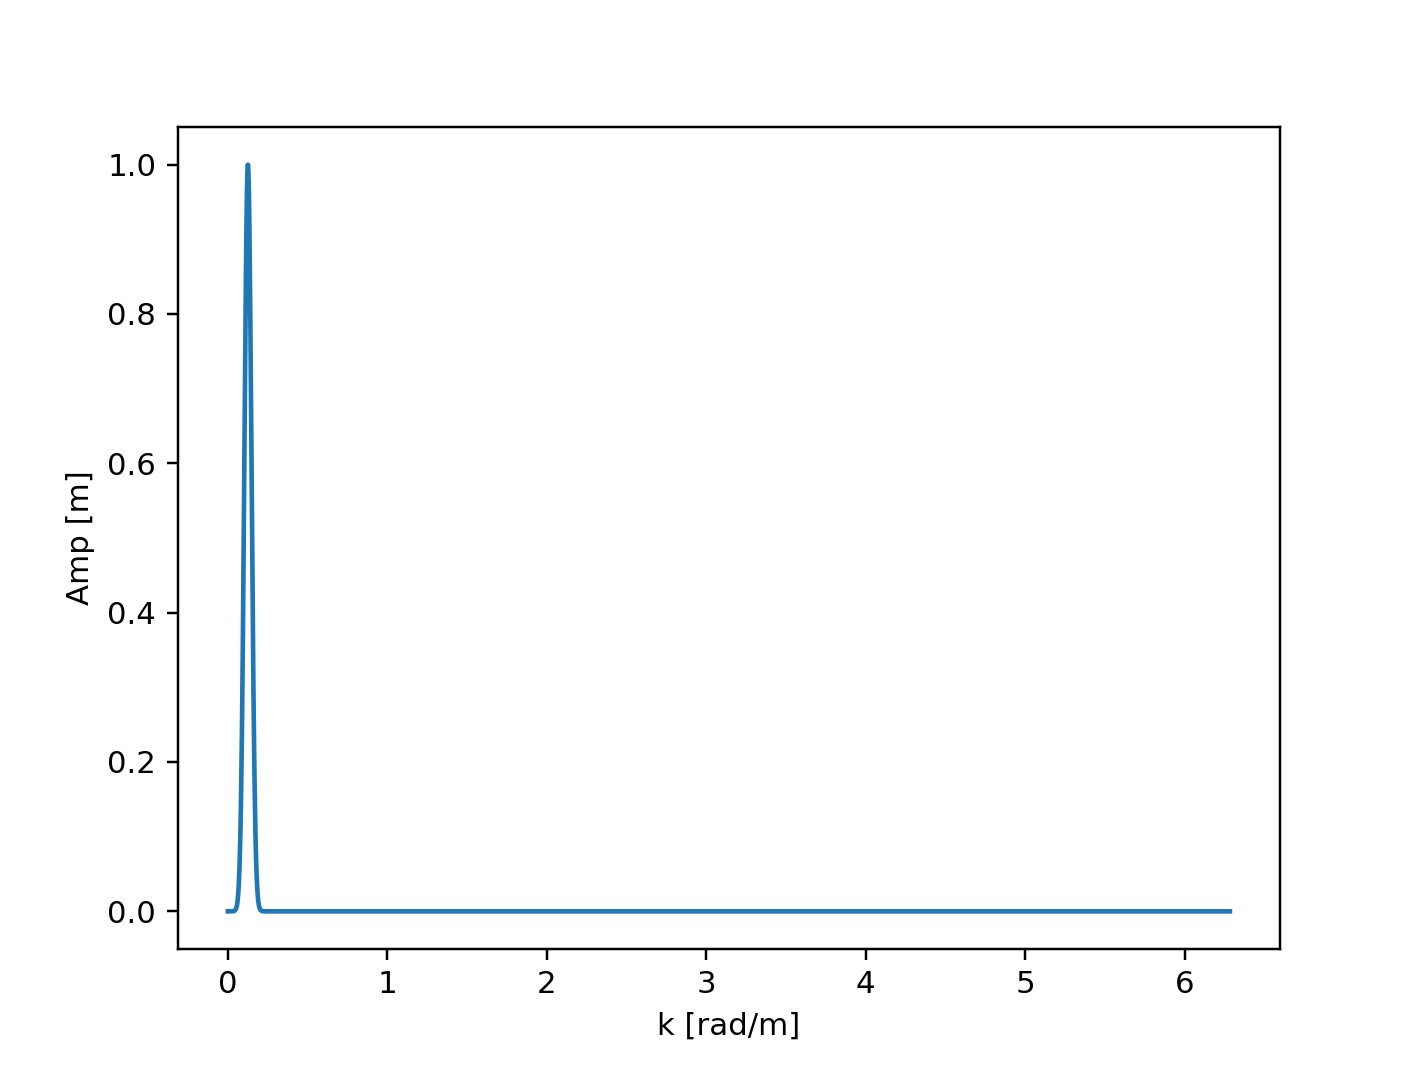

In [23]:
# Fourier Transform
dx = x[-1]-x[0]
k = np.arange(len(x))*np.pi*2./dx
k0 = np.pi*2./50
w = np.pi*2/200.
ff = 0*x+np.exp(-((k-k0)/w)**2)
#ff += np.exp(-((k/np.max(x)+k0)/w)**2)
#ff = np.fft.fftshift(ff)
fig,ax=plt.subplots()
ax.plot(k,np.abs(ff))
ax.set_xlabel('k [rad/m]')
ax.set_ylabel('Amp [m]')

fig.savefig('inputSpec.pdf')

<IPython.core.display.Javascript object>


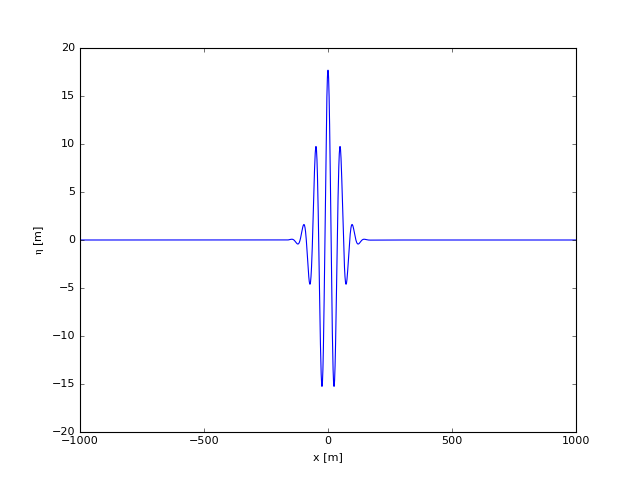

In [39]:
fig,ax = plt.subplots()
x = x-np.mean(x)
shap = np.exp(1j*np.outer(x,k))
af = shap*ff[np.newaxis,:]
ax.plot(x,np.real(np.sum(af,axis=1)))
#ax.plot(x,af[:,:4])
#for i in range(1,200,3):
#    ax.plot(x,np.sum(af[:,:i]+af[:,(-i):],axis=1),color='0.5',alpha=0.8)
#ax.set_xlim([0,210])
ax.set_xlabel('x [m]')
ax.set_ylabel(r'$\eta$ [m]')

fig.savefig('StartingPacket.pdf')

(2000,)


<IPython.core.display.Javascript object>


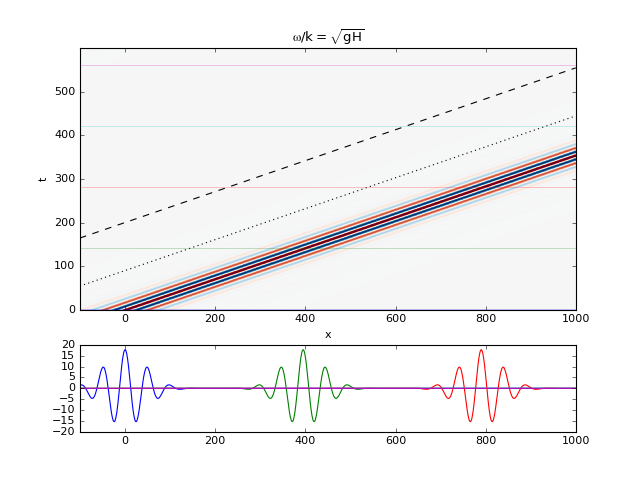

In [27]:
g = 1.;H = 1./k0
om = k*np.sqrt(g*H) # (set to be same speed as dispersive waves, H = 1/k0)
om[0]=0.
tt = np.arange(0,600.,0.2)
print(np.shape(ff))
Amp = np.dot(np.exp(-1j*np.outer(tt,om))*ff,shap.T)



#fig,axs=plt.subplots(3,1,sharex=True)
fig = plt.figure()
gs = gridspec.GridSpec(2, 1,
                       height_ratios=[3,1]
                       )

ax = plt.subplot(gs[0])
ax.pcolormesh(x,tt,Amp,cmap='RdBu_r',rasterized='True',vmin=-15,vmax=15)
cp = np.sqrt(g*H)
cg = np.sqrt(g*H)
ax.plot(x,x/cp+200.,'k--')
ax.plot(x,x/cg+90.,'k:')
ax.set_xlim(x[[0,-1]])
ax.set_ylim(tt[[0,-1]])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_xlim([-100,1000])
ax.set_title(r'$\omega/k  = \sqrt{g H}$')
tts = range(0,3000,700)
for ttt in tts:
    ax.plot(x,tt[ttt]+0.*x,lw=0.2)

ax = plt.subplot(gs[1])

for ttt in tts:
    ax.plot(x,Amp[ttt,:])
ax.set_xlim([-100,1000])
fig.savefig('NonDispersiveHov.pdf')

/Users/jklymak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/jklymak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


(2000,)


<IPython.core.display.Javascript object>


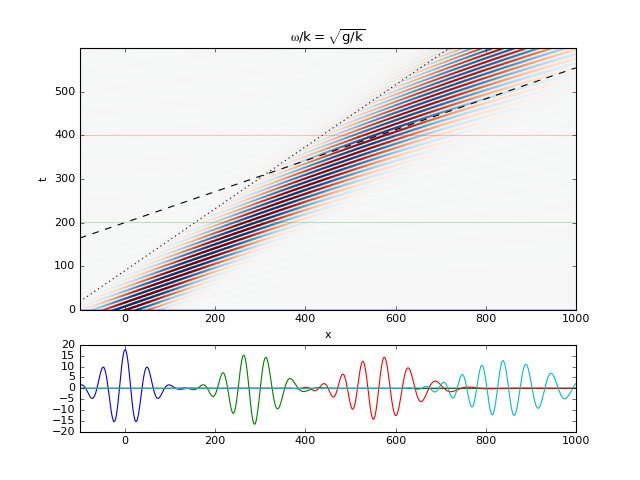

In [24]:
g = 1.;H = 1./k0
om = k*np.sqrt(g/k) # (set to be same speed as dispersive waves, H = 1/k0)
om[0]=0.
tt = np.arange(0,600.,0.2)
print(np.shape(ff))
Amp = np.dot(np.exp(-1j*np.outer(tt,om))*ff,shap.T)



#fig,axs=plt.subplots(3,1,sharex=True)
fig = plt.figure()
gs = gridspec.GridSpec(2, 1,
                       height_ratios=[3,1]
                       )

ax = plt.subplot(gs[0])
ax.pcolormesh(x,tt,Amp,cmap='RdBu_r',rasterized='True',vmin=-15,vmax=15)
cp = np.sqrt(g/k0)
cg = np.sqrt(g/k0)/2.
ax.plot(x,x/cp+200.,'k--')
ax.plot(x,x/cg+90.,'k:')
ax.set_xlim(x[[0,-1]])
ax.set_ylim(tt[[0,-1]])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_xlim([-100,1000])
ax.set_title(r'$\omega/k  = \sqrt{g/k}$')
tts = range(0,3000,1000)
for ttt in tts:
    ax.plot(x,0*x+tt[ttt],lw=0.2)

ax = plt.subplot(gs[1])
for ttt in tts:
    ax.plot(x,Amp[ttt,:])
ax.plot(x,Amp[-1,:])
ax.set_xlim([-100,1000])
fig.savefig('DispersiveHov.pdf')

/Users/jklymak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/jklymak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


(2000,)


<IPython.core.display.Javascript object>


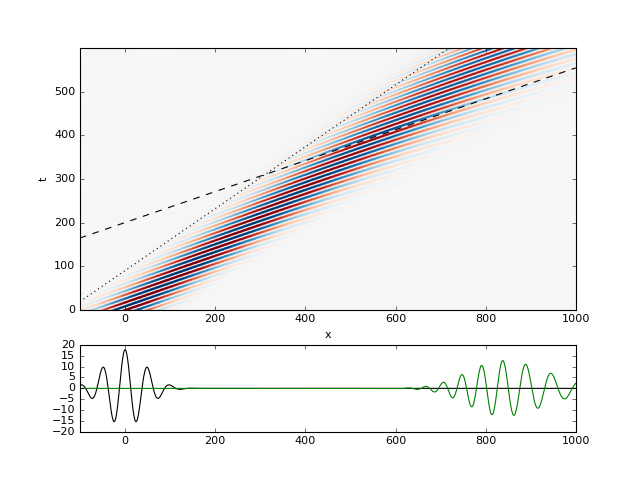

In [38]:
g = 1.;H = 1./k0
om = k*np.sqrt(g/k) # (set to be same speed as dispersive waves, H = 1/k0)
om[0]=0.
tt = np.arange(0,600.,0.2)
print(np.shape(ff))
Amp = np.dot(np.exp(-1j*np.outer(tt,om))*ff,shap.T)



#fig,axs=plt.subplots(3,1,sharex=True)
fig = plt.figure()
gs = gridspec.GridSpec(2, 1,
                       height_ratios=[3,1]
                       )

ax = plt.subplot(gs[0])
ax.pcolormesh(x,tt,Amp,cmap='RdBu_r',rasterized='True',vmin=-15,vmax=15)
cp = np.sqrt(g/k0)
cg = np.sqrt(g/k0)/2.
ax.plot(x,x/cp+200.,'k--')
ax.plot(x,x/cg+90.,'k:')
ax.set_xlim(x[[0,-1]])
ax.set_ylim(tt[[0,-1]])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_xlim([-100,1000])
Nt = len(tt)
ax0=ax
ax = plt.subplot(gs[1])
ax.plot(x,Amp[0,:],'k')
hh,=ax.plot(x,Amp[1,:],'g')
hh2,=ax0.plot(x,x*0.,'g')
for t in range(0,Nt,2):
    hh.remove()
    hh,=ax.plot(x,Amp[t,:],'g')
    ax.set_xlim([-100,1000])
    hh2.remove()
    hh2, = ax0.plot(x,x*0.+tt[t],'g')
    fig.savefig('movieSm/snap%04d.jpg'%t,dpi=150,quality=95,facecolor='w',transparent=False,frameon=True)

IndexError: list index out of range

<IPython.core.display.Javascript object>


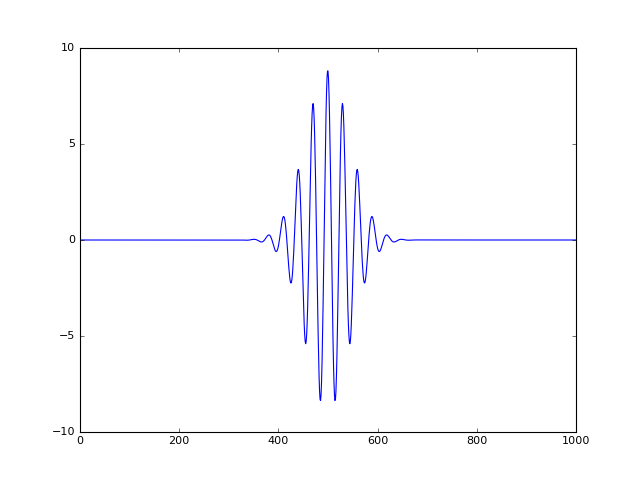

In [245]:
fig,ax = plt.subplots()
ax.plot(Amp[0,:])